# 회귀 알고리즘과 모델 규제
## k-최근접 이웃회귀

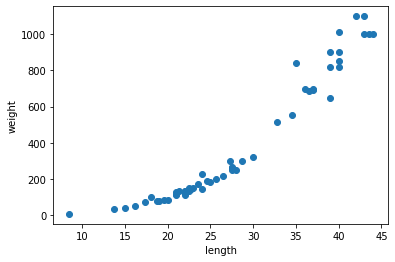

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 농어 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5,	27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                     	36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0,	40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])

# 산점도 확인
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 훈련 세트와 테스트 세트 준비

# train_test_split() 함수 사용
# 1개의 데이터 세트(perch_length)만 사용

# scikit-learn의 훈련 세트는 2차원 배열을 사용
# 입력 데이터 세트를 2차원 배열 형태로 변경이 필요
# reshape(row, col) 함수 사용
# (42,) -> (42, 1)형태로 변경

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

# reshape(-1, 1): -1: 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1) # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


In [5]:
# k-최근접 이웃 회귀 알고리즘
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 모델 훈련
knr.fit(train_input, train_target)

# score(): 훈련 모델 점수 확인, 결정 계수(R^2)를 리턴
print(knr.score(test_input, test_target))

0.992809406101064


In [6]:
# mean_absolute_error (MAE): 평균 절대 오차
# 타킷(실제 값)과 예측 값의 절대값 오차 평균

from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측값 계산
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대 오차 계산
# mae정도의 오차 발생(약 19g)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [7]:
# 테스트 세트를 사용하여 R2값 계산
print(knr.score(test_input, test_target))

# 훈련 세트 R2값 계산
print(knr.score(train_input, train_target))

# 테스트 세트의 값 > 훈련 세트의 값 => 과소적합

# 과대적합: 테스트세트에서는 점수가 매우나쁨. 훈련세트에만 적합 => 일반성 떨어짐
# 과소적합: 테스트세트점수>훈련세트점수, 또는 둘 모두 점수가 낮음(모델이 단순해서 훈련세트로 훈련이 되지 않은경우) 

0.992809406101064
0.9698823289099254


In [8]:
# 과소 적합 해결 방안: 이웃의 개수 줄임

knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)

print("훈련 데이터로 모델의 정확도 점수 계산: ",
       knr.score(train_input, train_target))

print("테스트 데이터로 모델의 정확도 점수 계산: ",
       knr.score(test_input, test_target))

훈련 데이터로 모델의 정확도 점수 계산:  0.9804899950518966
테스트 데이터로 모델의 정확도 점수 계산:  0.9746459963987609


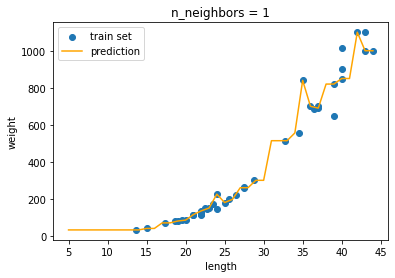

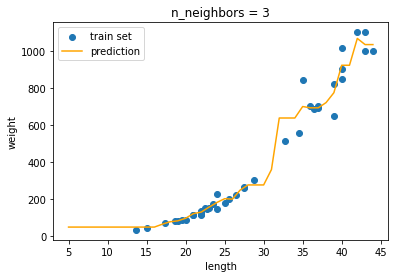

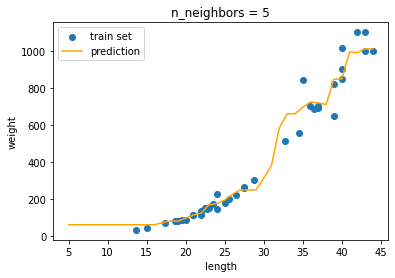

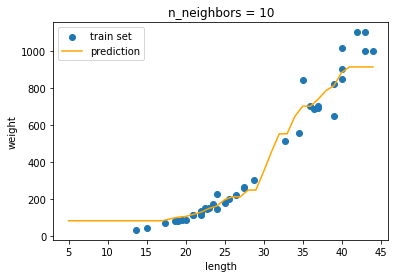

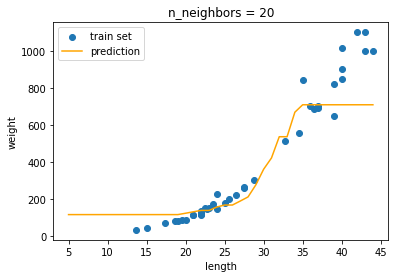

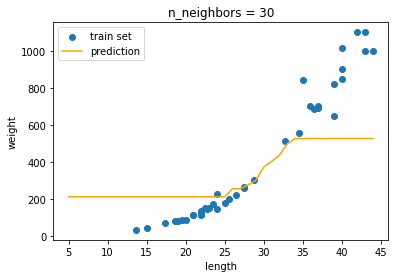

In [14]:
# 이웃의 수에 따른 그래프 비교
# 농어의 길이를 5~45까지 변경하면서 무게 예측

# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()

# x:농어의 길이(5 ~ 45까지 범위 설정)
# numpy에서 생성한 배열
x = np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 3, 5, 10, 20, 30]:
    
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x) # x: numpy에서 생성한 배열
    
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange') # 예측선 
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()